# Exploratory Data Analysis and Intro

## Goal
- Investigate top-paying roles and skills in the data science industry.
- Use Python to explode a real-live dataset on job postings.
- For job-seekers: use these insights to help find the best job opportunities.

## Final Deliverables
- Create Jupyter Notebooks (showcasing core skills in Python).
- Create a summary page (via README.md) capturing your findings.
- Share this project via Github & LinkedIn.

## Questions to Answer
1. What are the the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How ell do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

## Focus
I'll be focusing on US Data Anayst roles, but you can adapt to any of the following:

- Exploratory Data Analysis for all Data Roles
- Roles to Explore

## EDA for all Data Roles
### Roles to Explore

In [2]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/aref/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import warnings
warnings.filterwarnings('ignore')

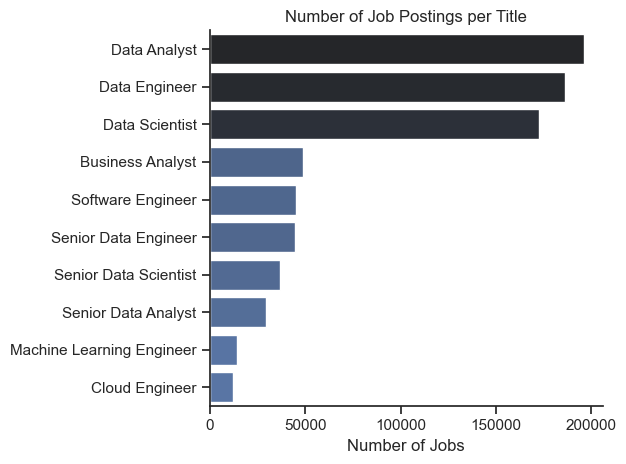

In [14]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_title_short', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('Number of Job Postings per Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')

plt.tight_layout()
plt.show()

### Countries to Explore

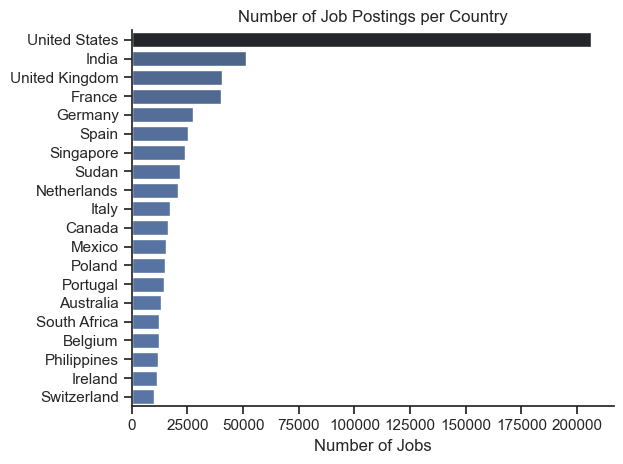

In [19]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_country', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('Number of Job Postings per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')

plt.tight_layout()
plt.show()

### Companies to Explore

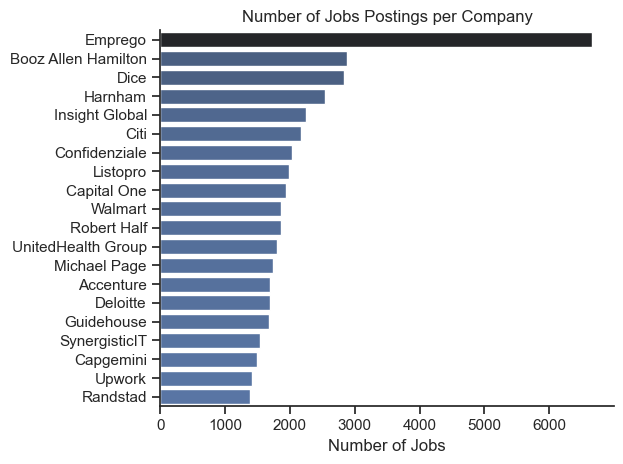

In [31]:
df_plot = df['company_name'].value_counts().head(20).to_frame()

sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette = 'dark:b_r', legend = False)
plt.title('Number of Jobs Postings per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
sns.despine()

plt.tight_layout()
plt.show()

### Job Opportunities

In [23]:
df['job_degree_mention'] = ~df['job_no_degree_mention']

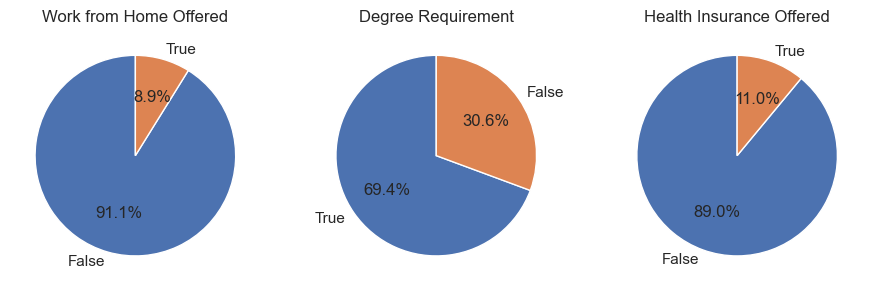

In [109]:

fig, ax = plt.subplots(1, 3, figsize = (11, 3.5))

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels = df[column].value_counts().index, autopct='%1.1f%%' , startangle = 90)
    ax[i].set_title(title)

plt.show()

## Exploratory Data Analysis for Data Analysts in the US

### Filter for Data Analyst Jobs in the US

In [32]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

In [35]:
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_degree_mention
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,True
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}",True
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin...",False
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p...",False
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']...",True
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']},True
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['...",False
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,False


### Locations to Explore:

In [8]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

In [10]:
df_plot

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


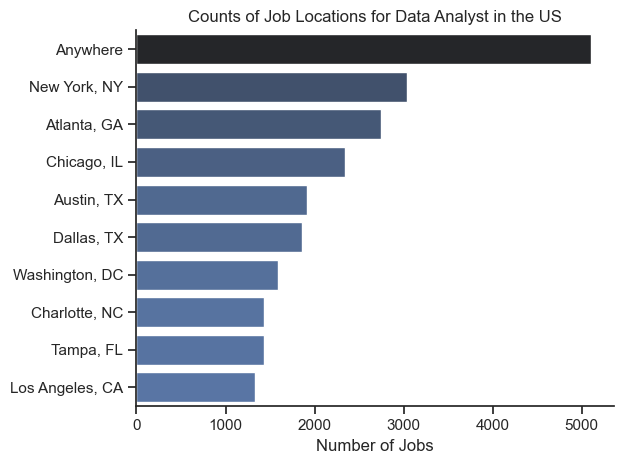

In [20]:
sns.set_theme(style = 'ticks')

sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette = 'dark:b_r', legend = False)
plt.title('Counts of Job Locations for Data Analyst in the US')
sns.despine()
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.tight_layout()
plt.show()

### Job Opportunities

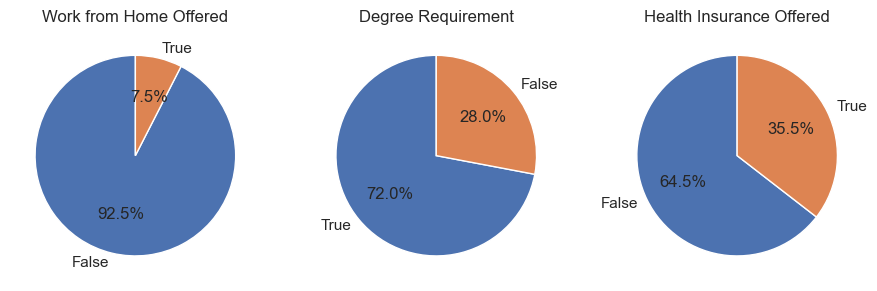

In [37]:
fig, ax = plt.subplots(1, 3, figsize = (11, 3.5))

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels = df_DA_US[column].value_counts().index, autopct='%1.1f%%' , startangle = 90)
    ax[i].set_title(title)

plt.show()

### Companies to Explore:

In [ ]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
df_plot

,count
company_name,
Robert Half,959
Insight Global,827
Dice,584
UnitedHealth Group,507
Get It Recruit - Information Technology,503
...,...
Radiant System,1
Coke,1
LIGHT,1


,count
company_name,
Robert Half,959
Insight Global,827
Dice,584
UnitedHealth Group,507
Get It Recruit - Information Technology,503
Citi,477
Corporate,416
SynergisticIT,374
Centene Corporation,350


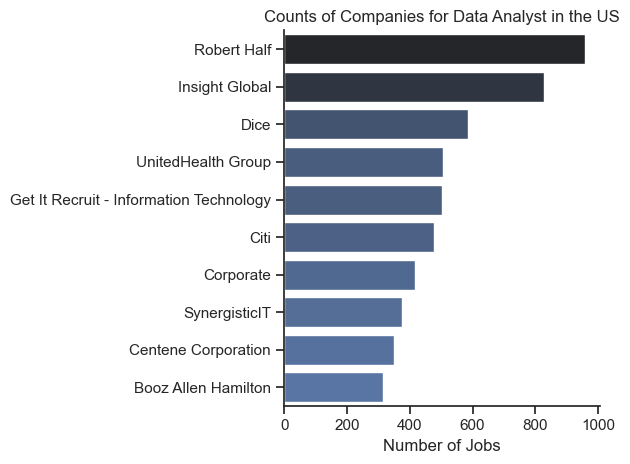

In [50]:
sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')

plt.tight_layout()
plt.show()